<a href="https://colab.research.google.com/github/Mhmd-sh3rawy/NTI_ML_notebooks/blob/main/Week3/second_day/Naive_Bayes/Naive_Bayes_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df_data = pd.read_csv('Naive-Bayes-Classification-Data.csv')
df_data

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1
...,...,...,...
990,45,87,0
991,40,83,0
992,40,83,0
993,40,60,1


array([[<Axes: title={'center': 'glucose'}>,
        <Axes: title={'center': 'bloodpressure'}>]], dtype=object)

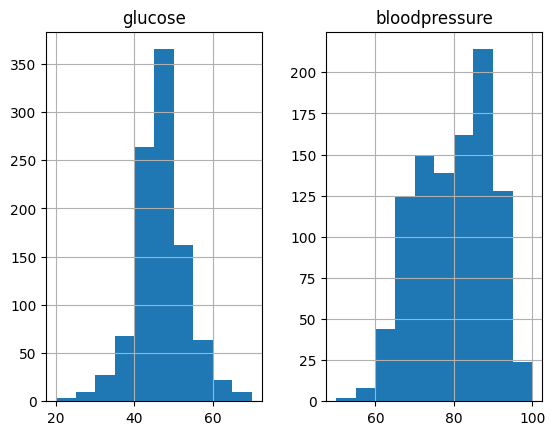

In [7]:
X = df_data.drop('diabetes', axis=1)
y = df_data['diabetes']
X.hist()

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [18]:
from sklearn.model_selection import cross_val_predict
scores = cross_val_predict(model, X_train, y_train, cv=5)


In [40]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, classification_report
print(precision_score(y_train, scores))
print(recall_score(y_train, scores))
print(f1_score(y_train, scores))

0.9269521410579346
0.9387755102040817
0.9328263624841572


In [41]:
print(confusion_matrix(y_train, scores))
print(classification_report(y_train, scores))


[[375  29]
 [ 24 368]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       404
           1       0.93      0.94      0.93       392

    accuracy                           0.93       796
   macro avg       0.93      0.93      0.93       796
weighted avg       0.93      0.93      0.93       796



In [43]:
scores_test = model.predict(X_test)
print(precision_score(y_test, scores_test))
print(recall_score(y_test, scores_test))
print(f1_score(y_test, scores_test))

0.978494623655914
0.8584905660377359
0.914572864321608


In [44]:
print(confusion_matrix(y_test, scores_test))
print(classification_report(y_test, scores_test))

[[91  2]
 [15 91]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.91        93
           1       0.98      0.86      0.91       106

    accuracy                           0.91       199
   macro avg       0.92      0.92      0.91       199
weighted avg       0.92      0.91      0.91       199



In [29]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

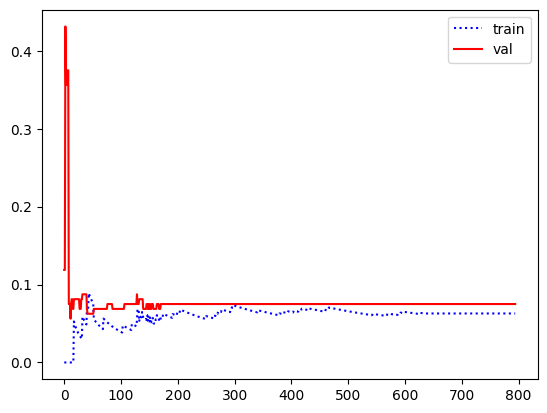

In [50]:
train_error_lst, val_error_lst = [], []
X_train_lc, X_val, y_train_lc, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
for i in range(1,len(X_train)):
  model.fit(X_train_lc[:i+1], y_train_lc[:i+1])
  y_pred_train = model.predict(X_train_lc[:i+1])
  y_pred_val = model.predict(X_val)
  train_error_lst.append(1 - accuracy_score(y_train_lc[:i+1], y_pred_train))
  val_error_lst.append(1 - accuracy_score(y_val, y_pred_val))
plt.plot(train_error_lst, 'b:', label='train')
plt.plot(val_error_lst, 'r-', label='val')
plt.legend()
plt.show()